# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset

In [2]:
df=pd.read_csv('titanic_dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocessing

# Checking the no.of rows and columns

In [4]:
df.shape

(891, 12)

In [5]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# Checking the unique values of PassengerID column

In [7]:
df['PassengerId'].nunique()

891

We can drop the column Passenger Id since all the values are unique.

In [8]:
df=df.drop(['PassengerId'],axis=1)

In [9]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking null values

In [10]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Null values present in Age, Cabin and Embarked

since most of the vlaues in Cabin are null values we can drop that column

In [12]:
df=df.drop('Cabin',axis=1)

In [13]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

Need to fill the null values.. Checking the distribution to find whether median or mean is to be used for filling null values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [15]:
frq_graph=df.select_dtypes(include=['float'])

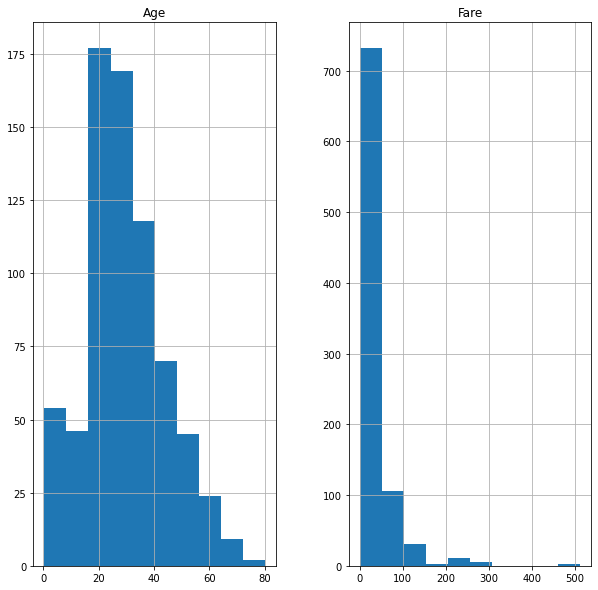

In [16]:
frq_graph.hist(figsize=[10,10])
plt.show()

Since the distribution of Age are not perfectly normal , we can fill null values with median.Since Embarked contain categorical values we can fill the null values with mode

In [17]:
  df['Age']=df['Age'].fillna(df['Age'].median())

In [18]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [19]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

All null values are filled

In [20]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


# Checking outliers for numerical features

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


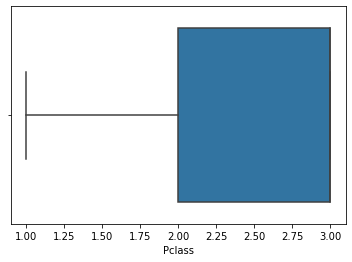

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


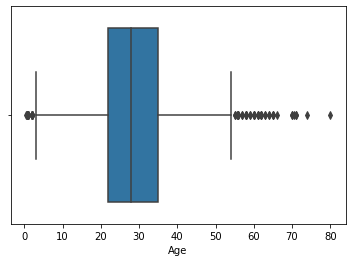

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


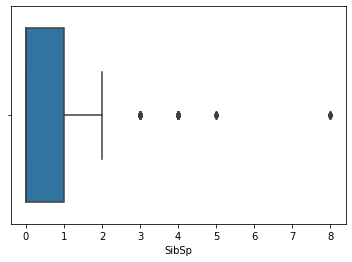

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


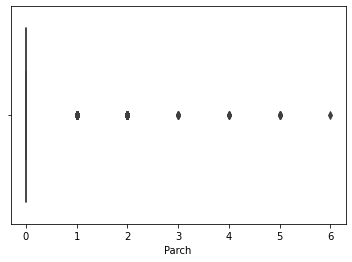

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


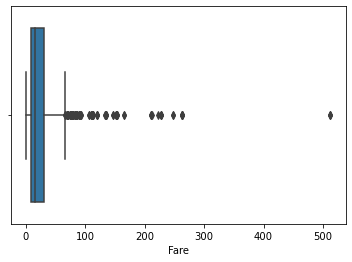

In [23]:
for i in ['Pclass','Age','SibSp','Parch','Fare']:
    sns.boxplot(df[i])
    plt.show()

Outliers are present in 'Age','SibSp','Parch','Fare'

# Removal of outliers for Age feature

In [24]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')

In [25]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upp_limit=Q3+1.5*IQR

In [26]:
outlier=[]
for x in df['Age']:
    if ((x>upp_limit) or (x<low_limit)):
        outlier.append(x)

In [27]:
ind1=df['Age']>upp_limit
out_ind=df.loc[ind1].index

In [28]:
out_ind

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [29]:
df.drop([11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

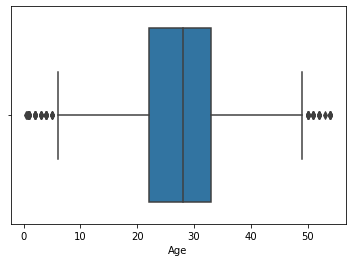

In [30]:
sns.boxplot(df['Age'])

# Removal of outliers for SbiSp feature

In [31]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')

In [32]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upp_limit=Q3+1.5*IQR

In [33]:
outlier=[]
for x in df['SibSp']:
    if ((x>upp_limit) or (x<low_limit)):
        outlier.append(x)

In [34]:
ind1=df['SibSp']>upp_limit
out_ind=df.loc[ind1].index

In [35]:
out_ind

Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')

In [36]:
df.drop([7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

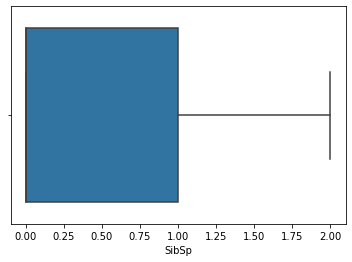

In [37]:
sns.boxplot(df['SibSp'])

# Removal of outliers for Parch feature

In [38]:
Q1=np.percentile(df['Parch'],25,interpolation='midpoint')
Q2=np.percentile(df['Parch'],50,interpolation='midpoint')
Q3=np.percentile(df['Parch'],75,interpolation='midpoint')

In [39]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upp_limit=Q3+1.5*IQR

In [40]:
outlier=[]
for x in df['Parch']:
    if ((x>upp_limit) or (x<low_limit)):
        outlier.append(x)

In [41]:
ind1=df['Parch']>upp_limit
out_ind=df.loc[ind1].index

In [42]:
out_ind

Int64Index([  8,  10,  13,  25,  43,  58,  65,  78,  86,  93,
            ...
            852, 853, 855, 856, 858, 869, 871, 880, 885, 888],
           dtype='int64', length=161)

In [43]:
df.drop([1, 31, 34, 52, 61, 62, 72, 92, 97, 102, 118, 120, 124, 139, 151, 155, 215, 218, 224, 230, 245, 256, 257, 258, 262, 269, 290, 291, 297, 299, 305, 306, 307, 310, 311, 318, 319, 325, 332, 334, 336, 337, 369, 373, 375, 377, 380, 385, 390, 393, 412, 435, 445, 453, 484, 486, 496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581, 585, 591, 609, 615, 627, 641, 645, 655, 660, 665, 679, 681, 689, 698, 700, 708, 716, 730, 737, 741, 742, 754, 759, 763, 765, 779, 789, 802, 820, 835, 849, 856],inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch'>

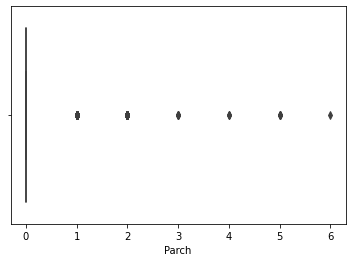

In [44]:
sns.boxplot(df['Parch'])

# Removal of outliers for Fare feature

In [45]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')

In [46]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upp_limit=Q3+1.5*IQR

In [47]:
outlier=[]
for x in df['Fare']:
    if ((x>upp_limit) or (x<low_limit)):
        outlier.append(x)

In [48]:
ind1=df['Fare']>upp_limit
out_ind=df.loc[ind1].index

In [49]:
out_ind

Int64Index([  3,   6,  35,  74,  83, 110, 137, 166, 169, 185, 248, 309, 329,
            356, 370, 383, 434, 457, 475, 509, 513, 523, 539, 571, 577, 599,
            621, 643, 669, 671, 678, 690, 692, 710, 712, 724, 748, 781, 809,
            826, 838, 867, 871],
           dtype='int64')

In [50]:
df.drop([3,6,  35,  74,  83, 110, 137, 166, 169, 185, 248, 309, 329,
            356, 370, 383, 434, 457, 475, 509, 513, 523, 539, 571, 577, 599,
            621, 643, 669, 671, 678, 690, 692, 710, 712, 724, 748, 781, 809,
            826, 838, 867, 871],inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

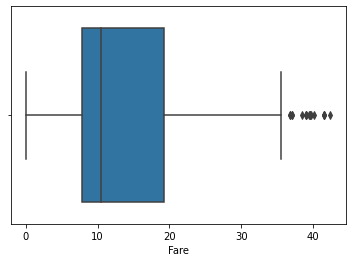

In [51]:
sns.boxplot(df['Fare'])

Outliers are removed

# Identifitying dependent variable y and independent variable x

In [52]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [53]:
x=df.drop('Survived',axis=1)


In [54]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [55]:
y=df['Survived']

In [56]:
y

0      0
2      1
4      0
5      0
8      1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 659, dtype: int64

# Encoding is to be done on categorical variables

In [57]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    659 non-null    int64  
 1   Name      659 non-null    object 
 2   Sex       659 non-null    object 
 3   Age       659 non-null    float64
 4   SibSp     659 non-null    int64  
 5   Parch     659 non-null    int64  
 6   Ticket    659 non-null    object 
 7   Fare      659 non-null    float64
 8   Embarked  659 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 51.5+ KB


In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['Name','Sex','Ticket','Embarked']:
    x[i]=le.fit_transform(x[i])

In [59]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,75,1,22.0,1,0,447,7.2500,2
2,3,250,0,26.0,0,0,560,7.9250,2
4,3,14,1,35.0,0,0,400,8.0500,2
5,3,406,1,28.0,0,0,215,8.4583,1
8,3,294,0,27.0,0,2,280,11.1333,2


# Standard scaling

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [61]:
x

array([[ 0.6620375 , -1.33517879,  0.66959066, ...,  0.9810575 ,
        -0.78020161,  0.5509833 ],
       [ 0.6620375 , -0.41527214, -1.49344975, ...,  1.66303097,
        -0.70399846,  0.5509833 ],
       [ 0.6620375 , -1.65583197,  0.66959066, ...,  0.69740481,
        -0.68988677,  0.5509833 ],
       ...,
       [ 0.6620375 , -0.17872472, -1.49344975, ...,  1.69924195,
         1.04867379,  0.5509833 ],
       [-2.43216613, -1.44031098,  0.66959066, ..., -1.70459026,
         1.7881265 , -2.15870324],
       [ 0.6620375 , -0.8936236 ,  0.66959066, ...,  0.66119383,
        -0.72375483, -0.80385997]])

In [62]:
x=pd.DataFrame(x)

In [63]:
x

,0,1,2,3,4,5,6,7,8
0,0.662037,-1.335179,0.669591,-0.563882,1.452334,-0.386232,0.981057,-0.780202,0.550983
1,0.662037,-0.415272,-1.493450,-0.167537,-0.525121,-0.386232,1.663031,-0.703998,0.550983
2,0.662037,-1.655832,0.669591,0.724239,-0.525121,-0.386232,0.697405,-0.689887,0.550983
3,0.662037,0.404759,0.669591,0.030636,-0.525121,-0.386232,-0.419100,-0.643792,-0.803860
4,0.662037,-0.183981,-1.493450,-0.068451,-0.525121,2.292996,-0.026815,-0.341802,0.550983
...,...,...,...,...,...,...,...,...,...
654,-0.885064,0.373219,0.669591,-0.068451,-0.525121,-0.386232,-1.426973,-0.131064,0.550983
655,-2.432166,-0.609767,-1.493450,-0.861140,-0.525121,-0.386232,-1.668379,1.788126,0.550983
656,0.662037,-0.178725,-1.493450,0.030636,1.452334,2.292996,1.699242,1.048674,0.550983
657,-2.432166,-1.440311,0.669591,-0.167537,-0.525121,-0.386232,-1.704590,1.788126,-2.158703


In [64]:
y

0      0
2      1
4      0
5      0
8      1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 659, dtype: int64

# Splitting into train and test data

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [67]:
metric_k=[]
neighbors=np.arange(3,15)
neighbors

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [68]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)
  

In [69]:
metric_k

[0.7878787878787878,
 0.7575757575757576,
 0.7954545454545454,
 0.7651515151515151,
 0.7727272727272727,
 0.7651515151515151,
 0.7878787878787878,
 0.7651515151515151,
 0.7878787878787878,
 0.7651515151515151,
 0.7727272727272727,
 0.7727272727272727]

In [70]:
 classifier=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [71]:
class_score=classifier.score(x_test,y_test)

In [72]:
class_score

0.7954545454545454

# KNN -K Fold

In [73]:
from sklearn.model_selection import KFold
kf=KFold(10)
for train_index,test_index in kf.split(x,y):
    print('training index',train_index)
    print('testing index',test_index)

training index [ 66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308

In [74]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(classifier,x,y,cv=kf)

In [75]:
cv_result

array([0.71212121, 0.78787879, 0.75757576, 0.75757576, 0.8030303 ,
       0.83333333, 0.8030303 , 0.81818182, 0.84848485, 0.78461538])

In [76]:
np.mean(cv_result)

0.7905827505827505

# Cross val score for KNN-K fold is 0.7905

# KNN-Stratified cross validation

In [77]:
from sklearn.model_selection import StratifiedKFold
sk=StratifiedKFold(n_splits=10)

In [78]:
for train_index,test_index in sk.split(x,y):
    print('training index',train_index)
    print('testing index',test_index)

training index [ 46  54  55  57  58  59  67  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308

In [79]:
cv_result=cross_val_score(classifier,x,y,cv=sk)

In [80]:
cv_result

array([0.72727273, 0.77272727, 0.78787879, 0.74242424, 0.81818182,
       0.78787879, 0.8030303 , 0.81818182, 0.81818182, 0.76923077])

In [81]:
np.mean(cv_result)

0.7844988344988345

# Cross val score for KNN-Statified K fold is 0.784

# SVM

In [82]:
from sklearn.svm import SVC

In [83]:
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred=svm_cls.predict(x_test)

# SVM-K fold

In [84]:
for train_index,test_index in kf.split(x,y):
    print('training index',train_index)
    print('testing index',test_index)

training index [ 66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308

In [85]:
cv_result=cross_val_score(svm_cls,x,y,cv=kf)

In [86]:
cv_result

array([0.78787879, 0.77272727, 0.74242424, 0.8030303 , 0.77272727,
       0.81818182, 0.75757576, 0.83333333, 0.8030303 , 0.78461538])

In [87]:
np.mean(cv_result)

0.7875524475524475

# Cross validation score for svm-k fold is 0.787

# SVM-Stratified k fold

In [88]:
for train_index,test_index in sk.split(x,y):
    print('training index',train_index)
    print('testing index',test_index)

training index [ 46  54  55  57  58  59  67  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308

In [89]:
cv_result=cross_val_score(svm_cls,x,y,cv=sk)

In [90]:
cv_result

array([0.8030303 , 0.77272727, 0.74242424, 0.81818182, 0.8030303 ,
       0.8030303 , 0.74242424, 0.81818182, 0.8030303 , 0.76923077])

In [91]:
np.mean(cv_result)

0.7875291375291374

# Cross validation score for svm-stratified k fold is 0.7875

# Highest cross validation score is for KNN-K fold 0.79